# Proyecto organizado en una clase

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

class Project1:
    
    def __init__(self,data_name) -> None:
        
        #CONSTS
        self.columns = ["SalePrice","OverallQuality","1stFlrSquareFeet","TotalRoomsAboveGrade","YearBuilt","LotFrontage"]
        self.y_key = "SalePrice"
        #START READING FILE
        print(f"############### Cargando Archivo {data_name} ###############")
        data = self.load_data(data_name)
        print(f"############### Archivo {data_name} cargado ###############")
        #INIT DATAFRAMES
        print(f"############### Haciendo slicing ###############")
        self.df = pd.DataFrame(data,columns=self.columns)
        sliced_data = self.slice_data(data)
        self.df_training = sliced_data[0]
        self.df_test = sliced_data[1]
        print(f"############### Slicing terminado ###############")
        
        
        
    def load_data(self,data_name):
        data = np.load(data_name)
        print(f"cantidad de registros {data.shape}")
        return data
    
    
    def slice_data(self,data):
        training_items = data.shape[0] * 80//100
        testing_items = data.shape[0] - training_items 
        print(f"cantidad de items para entrenamiento {training_items}, cantidad de items para pruebas {testing_items}")

        training_set = data[:training_items]
        testing_set = data[training_items:]

        df_training = pd.DataFrame(training_set,columns=self.columns)
        df_test = pd.DataFrame(testing_set,columns=self.columns)
        
        return (df_training,df_test)
    
    def create_scatter_plot(self,x,y,x_name,y_name,title):
        plt.scatter(x, y)
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.title(title)
        plt.show()
    
    def explore_data(self):
        print("############### Analisis Exploratorio ###############")
        df = self.df
        print("############### Media ###############")
        mean = df.mean()
        print(mean)
        print("############### Maximo ###############")
        mean = df.max()
        print(mean)
        print("############### Minimo ###############")
        mean = df.min()
        print(mean)
        print("############### Peak ###############")
        mean = df.max() - df.min()
        print(mean)
        print("############### Desviacion estandar ###############")
        mean = df.std()
        print(mean)
        print("############### FIN Exploratorio ###############")
        
    
    def histogram_show(self):
        df = self.df
        for column in df.columns:
            plt.figure(figsize=(50, 20)) 
            sns.displot(df[column], bins=15, kde=True) 
            plt.title(f"{column}'s Histogram")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()
    
    def select_best_two_vars(self):
        print("############### Para cada variable indenpendiente X ###############")
        
        
        
        df = self.df
        y_key = self.y_key
        correlations = []
        
        for column in df.columns: 
            if(column == y_key):
                continue
            correlation = df[column].corr(df[y_key])
            print(f"variable: '{column}' correlacion: {correlation}")
            correlations.append((column,y_key,correlation))

        correlations =  sorted(correlations, key=lambda x: x[2], reverse=True)

        
        for item in correlations:
            print(item)
            x_key = item[0]
            y_key = item[1]
            correlation = item[2]
            self.create_scatter_plot(df[x_key],df[y_key],x_key,y_key,correlation)
        
        self.first_var = correlations[0]
        self.second_var = correlations[1]
        
        print(f"La mejor variable es: {self.first_var[0]}, con una correlacion de {self.first_var[2]}")
        print(f"La segunda mejor variable es: {self.second_var[0]}, con una correlacion de {self.second_var[2]}")
        
        print("############### Fin para cada variable indenpendiente X ###############")
    
    def training_func(self,x,y,alpha, epochs = 200):
        n = len(x)
        
        betas = np.zeros(2)
        
        y_hat = 0
        
        models = []
        X_b = np.c_[np.ones((n, 1)), x] 
        
        for epoch in range(epochs) :

            y_hat = np.dot(X_b, betas)
            
            y_diff = y_hat - y
            
            error_betas = 1/n * X_b.T.dot(y_diff)

            betas = betas - alpha*error_betas

            error = (1/(2*n)) *  np.sum((y - y_hat)**2)
            
            model = {
                "beta0":betas[0],
                "beta1":betas[1],
            }
            
            models.append({
                "epoch":epoch,
                "model":model,
                "error":error
            })
            
        return {
            "final_beta0":betas[0],
            "final_beta1":betas[1],
            "models":models,
            "prediction":y_hat
        }
        
    def graph_error(self,params):
    
        errors = []
        for epoc in params["models"]:
            errors.append(epoc["error"])
        
        plt.figure(figsize=(10, 6))
        plt.plot(errors, marker='o', linestyle='-', color='blue')  
        plt.title('Error por epoch') 
        plt.xlabel('Epochs') 
        plt.ylabel('Error') 
        plt.grid(True) 
        plt.show() 


    def graph_evolution(self,params,n):
        if n < 0:
            n = 1
            
        epochs = []
        iter = 1
        plt.figure(figsize=(10, 6))
        
        
        plt_iters = []
        plt_betas0 = []
        plt_betas1 = []
        
        for epoch in params["models"]:
            if(n == iter):
                epochs.append(epoch)
                
                model = epoch["model"]
                
                iter_id = epoch["epoch"]
                
                iter_beta0 = model["beta0"]
                iter_beta1 = model["beta1"]
                
                plt_iters.append(iter_id)
                plt_betas0.append(iter_beta0)
                plt_betas1.append(iter_beta1)
                
                
                iter = 1
            else:
                iter = iter + 1
                
        
        plt.scatter( plt_iters,plt_betas0, color='blue', label='Beta 0')
        plt.scatter( plt_iters,plt_betas1, color='red', label='Beta 1')
        
        
        plt.title('Evolución del Modelo')
        plt.xlabel('Iteracion')
        plt.ylabel('Parametros')
        plt.legend()
        plt.show()
        
        
    def get_error(self,y,y_hat):
        n = len(y)
        return (1/(2*n)) *  np.sum((y - y_hat)**2)    
    
    def predict_first_var(self,X):
        
        x_key = "OverallQuality"#1stFlrSquareFeet
        
        X = np.array(X)
        x_training = np.array(self.df_training[x_key])
        y_training = np.array(self.df_training[self.y_key])

        #Manual training
        alpha = 0.04312
        epoch = 100
        manual_training = self.training_func(x_training,y_training,alpha,epoch)
        beta0 = manual_training["final_beta0"]
        beta1 = manual_training["final_beta1"]
        
        manual_prediction =  beta0 + (X*beta1)
        
        #Scikit learn training
        reg = LinearRegression().fit(x_training.reshape(-1,1), y_training.reshape(-1,1))
        scikit_prediction = reg.predict(X.reshape(-1,1)).flatten()
        
        #Average prediction
        avg_prediction = (manual_prediction+scikit_prediction)/2
                
        #GRAPHS        
        self.graph_error(manual_training)
        self.graph_evolution(manual_training,3)
        
        
        return {"PrediccionManual":manual_prediction,"PrediccionScikit":scikit_prediction,"PrediccionPromedio":avg_prediction}
    
    def validate_first(self,predictions):
        self.validate(predictions,"OverallQuality")
        
        
        
    def predict_second_var(self,X):
        
        x_key = "1stFlrSquareFeet"
        
        X = np.array(X)
        x_training = np.array(self.df_training[x_key])
        y_training = np.array(self.df_training[self.y_key])

        #Manual training
        alpha = 0.0000013
        epoch = 100
        manual_training = self.training_func(x_training,y_training,alpha,epoch)
        beta0 = manual_training["final_beta0"]
        beta1 = manual_training["final_beta1"]
        
        manual_prediction =  beta0 + (X*beta1)
        
        #Scikit learn training
        reg = LinearRegression().fit(x_training.reshape(-1,1), y_training.reshape(-1,1))
        scikit_prediction = reg.predict(X.reshape(-1,1)).flatten()
        
        #Average prediction
        avg_prediction = (manual_prediction+scikit_prediction)/2
                
        #GRAPHS        
        self.graph_error(manual_training)
        self.graph_evolution(manual_training,3)
        
        
        return {"PrediccionManual":manual_prediction,"PrediccionScikit":scikit_prediction,"PrediccionPromedio":avg_prediction}
    
    def validate_second(self,predictions):
        self.validate(predictions,"1stFlrSquareFeet")
   
    
    def validate(self,predictions,name):
        lowest_error = 0
        lowest_name = ""
        is_first = True 
        y_test = np.array(self.df_test[self.y_key])
        
        errors = []
        
        for key, y_items in predictions.items():
            y_err = self.get_error(y_test,y_items)
            if( is_first):
                lowest_error = y_err
                lowest_name = key
                is_first = False
            elif y_err <= lowest_error:
                lowest_error = y_err
                lowest_name = key
                
            errors.append(y_err)
                
        plt.figure(figsize=(10, 6))
        plt.bar(predictions.keys(), errors, color='skyblue')
        plt.xlabel('Modelos')
        plt.ylabel('MSE')
        plt.title('Error de cada modelo para la variable x')
        plt.show()
            
        print(f"Para : {name}, la mejor prediccion es: {lowest_name}, con un error de: {lowest_error}")
    


# Crear Objeto

############### Cargando Archivo proyecto_training_data.npy ###############
cantidad de registros (1460, 6)
############### Archivo proyecto_training_data.npy cargado ###############
############### Haciendo slicing ###############
cantidad de items para entrenamiento 1168, cantidad de items para pruebas 292
############### Slicing terminado ###############
############### Analisis Exploratorio ###############
############### Media ###############
SalePrice               180921.195890
OverallQuality               6.099315
1stFlrSquareFeet          1162.626712
TotalRoomsAboveGrade         6.517808
YearBuilt                 1971.267808
LotFrontage                 70.049958
dtype: float64
############### Maximo ###############
SalePrice               755000.0
OverallQuality              10.0
1stFlrSquareFeet          4692.0
TotalRoomsAboveGrade        14.0
YearBuilt                 2010.0
LotFrontage                313.0
dtype: float64
############### Minimo ###############
SalePrice     

<Figure size 5000x2000 with 0 Axes>

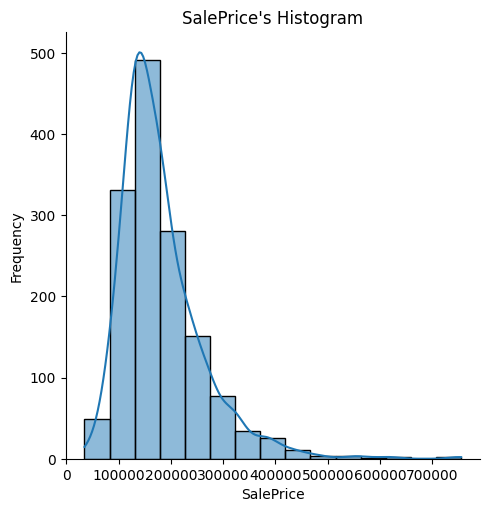

<Figure size 5000x2000 with 0 Axes>

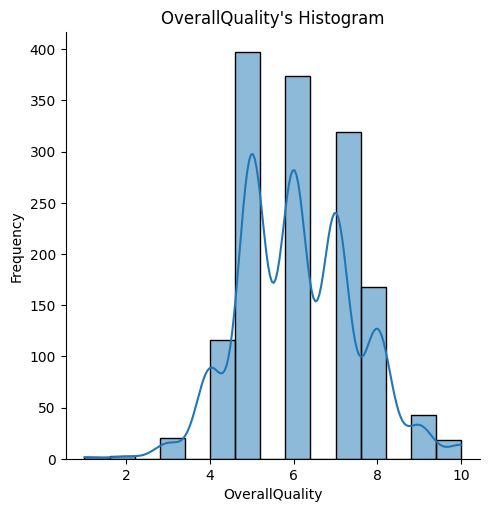

<Figure size 5000x2000 with 0 Axes>

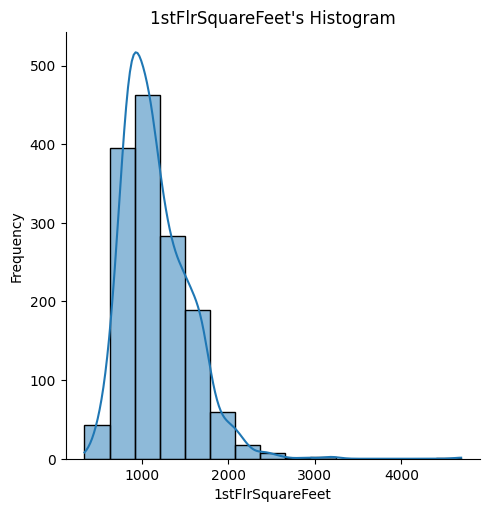

<Figure size 5000x2000 with 0 Axes>

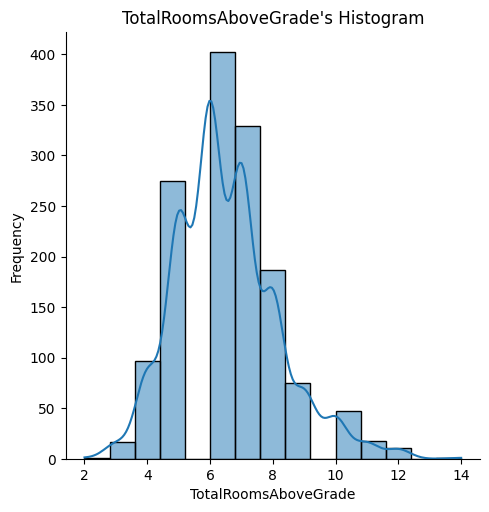

<Figure size 5000x2000 with 0 Axes>

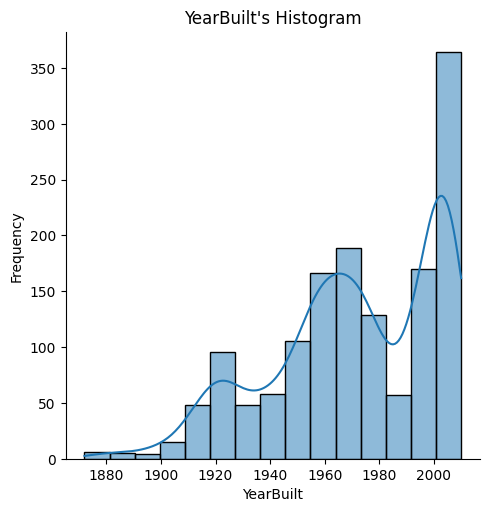

<Figure size 5000x2000 with 0 Axes>

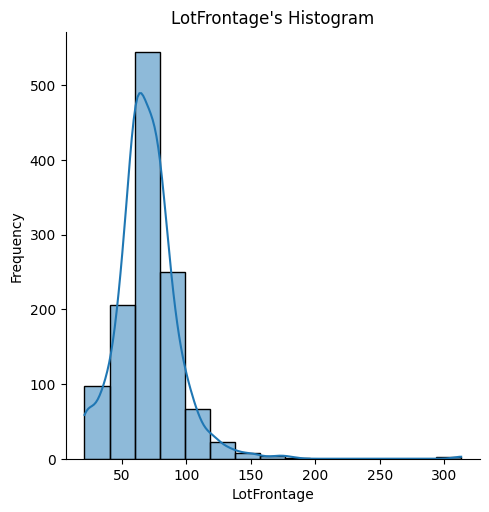

############### Para cada variable indenpendiente X ###############
variable: 'OverallQuality' correlacion: 0.7909816005838052
variable: '1stFlrSquareFeet' correlacion: 0.6058521846919145
variable: 'TotalRoomsAboveGrade' correlacion: 0.5337231555820281
variable: 'YearBuilt' correlacion: 0.5228973328794968
variable: 'LotFrontage' correlacion: 0.351799096570678
('OverallQuality', 'SalePrice', 0.7909816005838052)


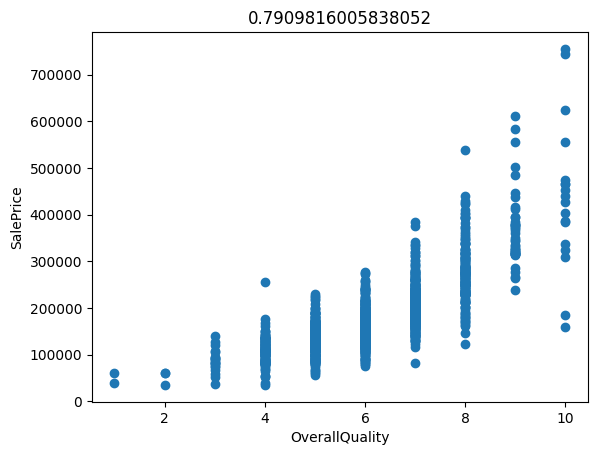

('1stFlrSquareFeet', 'SalePrice', 0.6058521846919145)


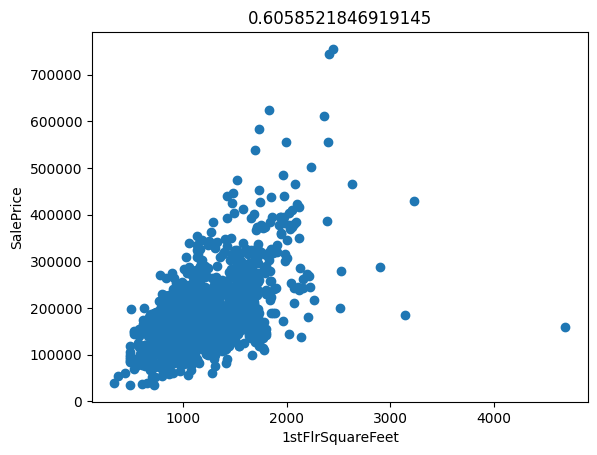

('TotalRoomsAboveGrade', 'SalePrice', 0.5337231555820281)


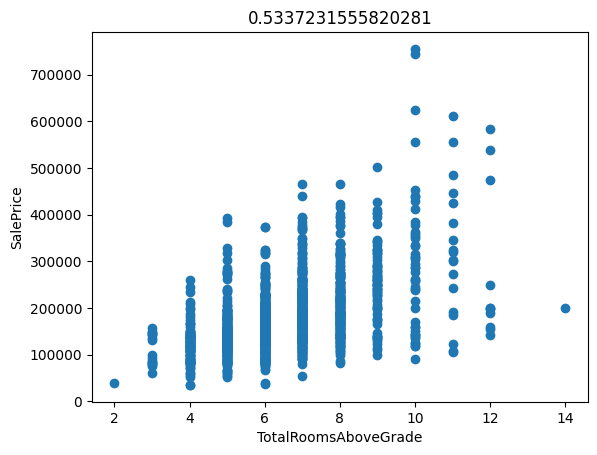

('YearBuilt', 'SalePrice', 0.5228973328794968)


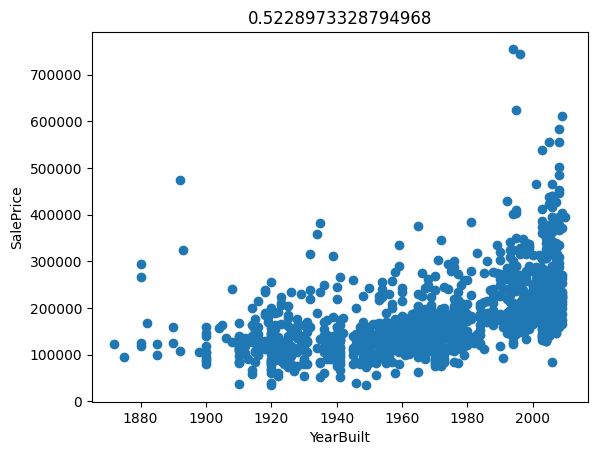

('LotFrontage', 'SalePrice', 0.351799096570678)


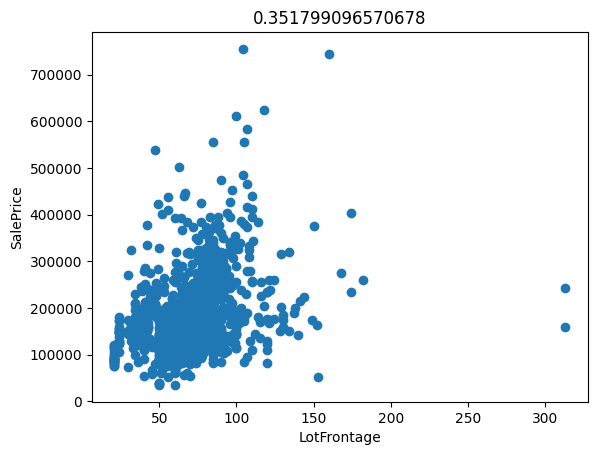

La mejor variable es: OverallQuality, con una correlacion de 0.7909816005838052
La segunda mejor variable es: 1stFlrSquareFeet, con una correlacion de 0.6058521846919145
############### Fin para cada variable indenpendiente X ###############


In [219]:
P = Project1("proyecto_training_data.npy")
P.explore_data()
P.histogram_show()
P.select_best_two_vars()



# Calculo para la mejor variable "OverallQuality"

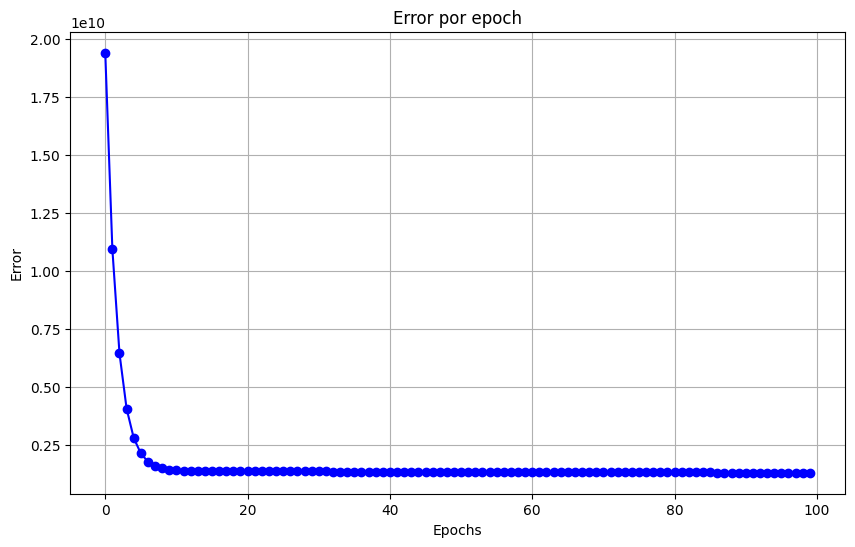

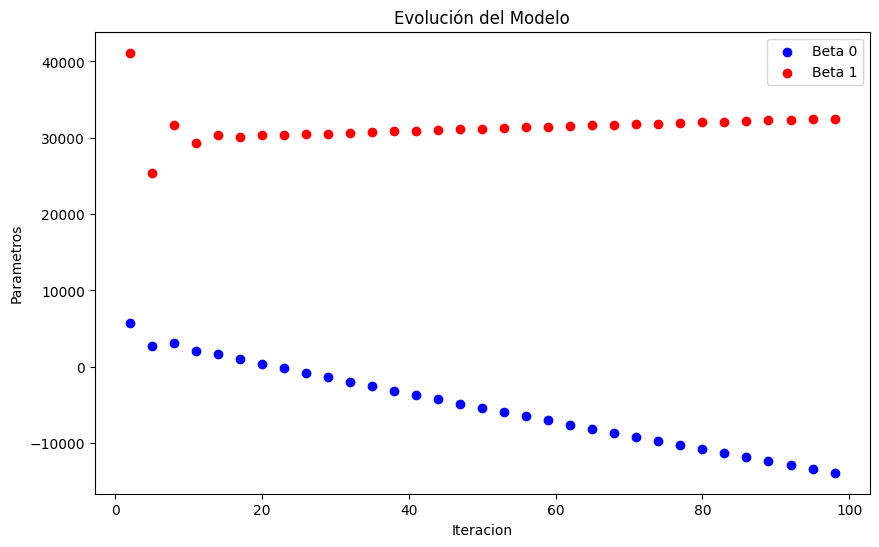

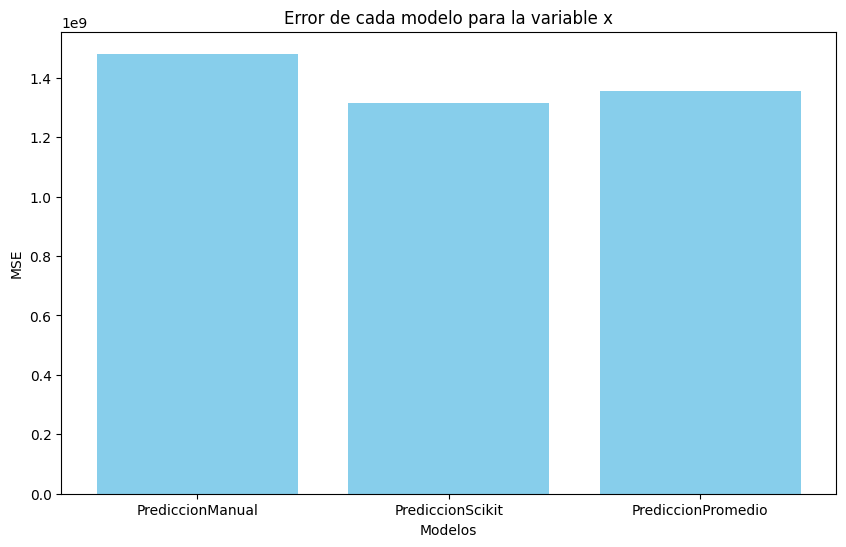

Para : OverallQuality, la mejor prediccion es: PrediccionScikit, con un error de: 1315091304.4743197


In [220]:
#Predict best variable
prediction  = P.predict_first_var(P.df_test["OverallQuality"])
#Validate best variable
P.validate_first(prediction)

## La mejor prediccion fue la de ScikitLearn

# Calculo para la mejor variable "1stFlrSquareFeet"

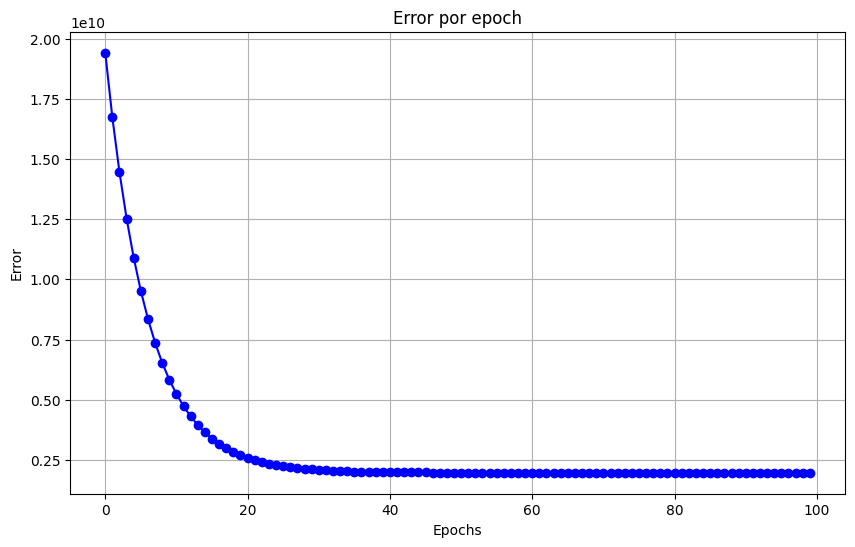

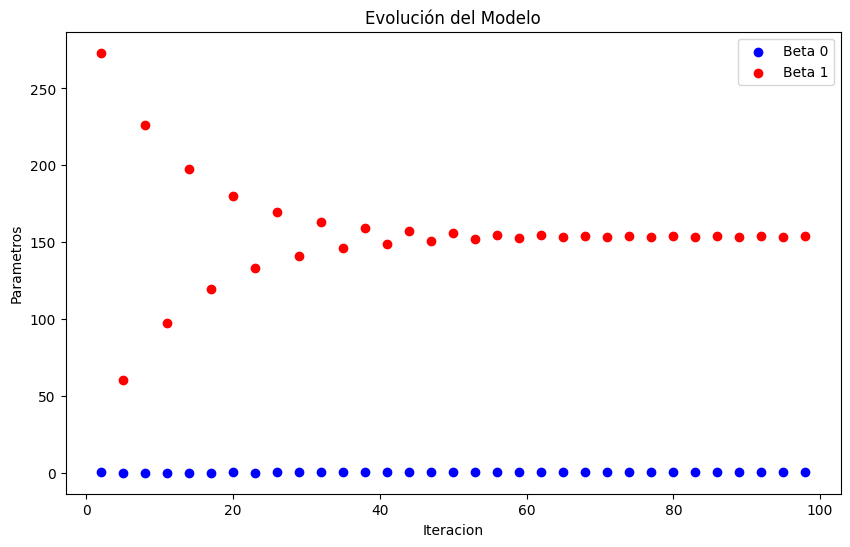

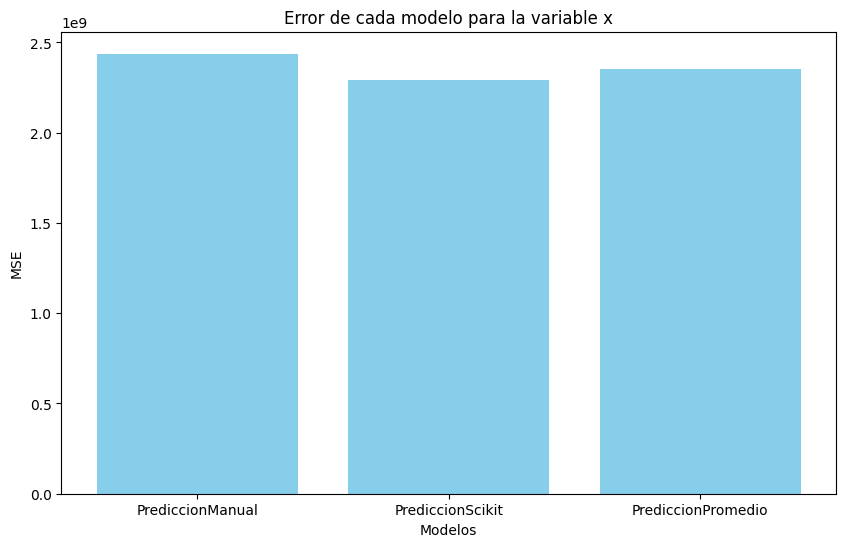

Para : 1stFlrSquareFeet, la mejor prediccion es: PrediccionScikit, con un error de: 2292769137.345937


In [221]:
#Predict best variable
prediction  = P.predict_second_var(P.df_test["1stFlrSquareFeet"])
#Validate best variable
P.validate_second(prediction)

# Procedimiento de como se obtuvo el proyecto

# Dependencias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar datos

In [ ]:
data = np.load("proyecto_training_data.npy")
columns = ["SalePrice","OverallQuality","1stFlrSquareFeet","TotalRoomsAboveGrade","YearBuilt","LotFrontage"]
df = pd.DataFrame(data,columns=columns)
print(f"cantidad de registros {data.shape}")

# Slicing

In [ ]:
training_items = data.shape[0] * 80//100
testing_items = data.shape[0] - training_items 
print(f"cantidad de items para entrenamiento {training_items}, cantidad de items para pruebas {testing_items}")

training_set = data[:training_items]
testing_set = data[training_items:]

df_training = pd.DataFrame(training_set,columns=columns)
df_test = pd.DataFrame(testing_set,columns=columns)

# Exploratorio

## Media

In [ ]:
mean = df.mean()
print(mean)

## Maximo

In [ ]:
max = df.max()
print(mean)

## Minimo

In [ ]:
min = df.min()
print(min)

## peak

In [ ]:
peak = df.max() - df.min()
print(peak)

## Desviacion estandar

In [ ]:
std = df.std()
print(std)

# Histograma

In [ ]:
def histogram_show(column):
    plt.figure(figsize=(50, 20)) 
    sns.displot(df[column], bins=15, kde=True) 
    plt.title(f"{column}'s Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

for columna in df.columns:
    histogram_show(columna)

# 5. Para cada variable independiente X

In [ ]:
correlations = []
y_key = "SalePrice"

def create_catter_plot(x,y,x_name,y_name,title):
    plt.scatter(x, y)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.show()

for column in df.columns: 
    if(column == y_key):
        continue
    correlation = df[column].corr(df[y_key])
    print(f"variable: '{column}' correlacion: {correlation}")
    correlations.append((column,y_key,correlation))

correlations =  sorted(correlations, key=lambda x: x[2], reverse=True)


In [ ]:
for item in correlations:
    print(item)
    x_key = item[0]
    y_key = item[1]
    correlation = item[2]
    create_catter_plot(df[x_key],df[y_key],x_key,y_key,correlation)


## Mejores 2 variables

In [ ]:
first_var = correlations[0]
second_var = correlations[1]

print(f"La mejor variable es: {first_var[0]}, con una correlacion de {first_var[2]}")
print(f"La segunda mejor variable es: {second_var[0]}, con una correlacion de {second_var[2]}")

# Crear funcion para entrenar modelo

In [ ]:

    
#training_func()



def training_func(x,y,alpha, epochs = 200):
    n = len(x)
    
    betas = np.array([0,0])
    
    y_hat = 0
    
    models = []
    
    for epoch in range(epochs) :

        X_b = np.c_[np.ones((n, 1)), x] 
        y_hat = np.dot(X_b, betas)
        
        error_betas = np.array([np.sum((y_hat - y)),np.sum((y_hat - y)*x)])
        error_betas = np.dot(1/n,error_betas)

        betas = betas - alpha*error_betas

        error = (1/(2*n)) *  np.sum((y - y_hat)**2)
        
        model = {
            "beta0":error_betas[0],
            "beta1":error_betas[1],
        }
        
        models.append({
            "epoch":epoch,
            "model":model,
            "error":error
        })
        
    return {
        "models":models,
        "prediction":y_hat
    }
    
x = df_training[first_var[0]]
y = df_training[y_key]
alpha = 0.04312
trained = training_func(x,y,alpha)


In [ ]:


def graph_error(params):
    
    errors = []
    for epoc in params["models"]:
        errors.append(epoc["error"])
    
    plt.figure(figsize=(10, 6))
    plt.plot(errors, marker='o', linestyle='-', color='blue')  
    plt.title('Error por epoch') 
    plt.xlabel('Epochs') 
    plt.ylabel('Error') 
    plt.grid(True) 
    plt.show() 
    
graph_error(trained)

In [ ]:
def graph_evolution(params,n):
    if n < 0:
        n = 1
        
    epochs = []
    iter = 1
    plt.figure(figsize=(10, 6))
    
    
    plt_iters = []
    plt_betas0 = []
    plt_betas1 = []
    
    for epoch in params["models"]:
        if(n == iter):
            epochs.append(epoch)
            
            model = epoch["model"]
            
            iter_id = epoch["epoch"]
            
            iter_beta0 = model["beta0"]
            iter_beta1 = model["beta1"]
            
            plt_iters.append(iter_id)
            plt_betas0.append(iter_beta0)
            plt_betas1.append(iter_beta1)
            
            
            iter = 1
        else:
            iter = iter + 1
            
    print(plt_betas1)
    
    plt.scatter( plt_iters,plt_betas0, color='blue', label='Beta 0')
    plt.scatter( plt_iters,plt_betas1, color='red', label='Beta 1')
    
    
    plt.title('Evolución del Modelo')
    plt.xlabel('Iteracion')
    plt.ylabel('Parametros')
    plt.legend()
    plt.show()
    
graph_evolution(trained,2)

# Comparacion para elegir epochs y alpha

## Epochs primera variable

In [ ]:
x = df_training[first_var[0]]
y = df_training[y_key]

epoch_test_list = [5,10,20,30,40,80,500,1000]
alpha = 0.04312

for epoch_test in epoch_test_list:
    res = training_func(x,y,alpha,epoch_test)
    graph_error(res)

## Alpha primera variable

In [ ]:
x = df_training[first_var[0]]
y = df_training[y_key]

alpha_test_list = [  0.00001, 0.02, 0.03,0.04312,0.045,0.051,0.06,0.07,0.1]
alpha = 0.04312

for alpha_test in alpha_test_list:
    res = training_func(x,y,alpha_test,100)
    graph_error(res)

### Resultados para variable 1

### Valor para alpha: 0.04312
### Valor para epoch: 100

## Alpha segunda variable

In [ ]:
x = df_training[second_var[0]]
y = df_training[y_key]


alpha_test_list = [  0.000001,0.0000012,0.0000013,0.0000014,0.0000015,0.000002]
#0.0000013
for alpha_test in alpha_test_list:
    res = training_func(x,y,alpha_test,200)
    print(f"valor de alpha: {alpha_test}")
    graph_error(res)

## Epoch segunda variable

In [ ]:
x = df_training[second_var[0]]
y = df_training[y_key]


epoch_test_list = [  2,5,10,20,50,100,200]
alpha = 0.0000013
#epoch 100
for epoch_test in epoch_test_list:
    res = training_func(x,y,alpha,epoch_test)
    print(f"valor de epoch: {epoch_test}")
    graph_error(res)

## Segunda variable
### Valor para alpha: 0.0000013
### Valor para epoch: 100

In [ ]:
x = df_training[[second_var[0]]]
y = df_training[y_key]
reg = LinearRegression().fit(x, y)

